In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
data=pd.read_csv('/Users/gauravtyagi/Downloads/data/CC_GENERAL.csv')

In [48]:
data.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [49]:
data.info()
#BALANCE,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [50]:
data.CREDIT_LIMIT.fillna(data.CREDIT_LIMIT.mean(),inplace=True)
#data.head(5)
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
sc=StandardScaler()

In [51]:
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [52]:
data.MINIMUM_PAYMENTS.fillna(data.MINIMUM_PAYMENTS.mean(),inplace=True)
#data.info()

In [53]:
from sklearn.cluster import KMeans, MeanShift
from sklearn.model_selection import train_test_split 

In [54]:
#data1=data.drop(['CUST_ID'], axis=1)
data1=pd.DataFrame(data,columns=['BALANCE','PURCHASES'])

AxesSubplot(0.125,0.125;0.775x0.755)


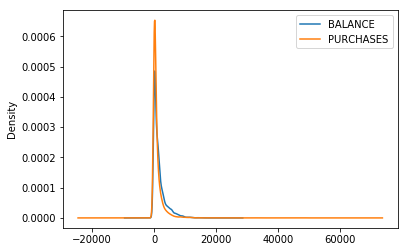

In [55]:
print(data1.plot.kde())

In [56]:
sc.fit_transform(data1)

array([[-0.73198937, -0.42489974],
       [ 0.78696085, -0.46955188],
       [ 0.44713513, -0.10766823],
       ...,
       [-0.7403981 , -0.40196519],
       [-0.74517423, -0.46955188],
       [-0.57257511,  0.04214581]])

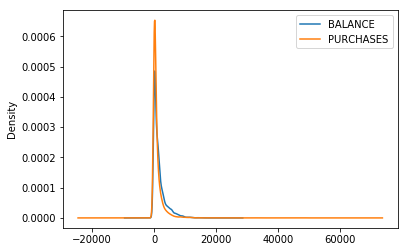

In [57]:
df = pd.DataFrame(data1, columns=data.columns)
data1.plot.kde()

In [58]:
kmeans = KMeans(n_clusters=12)
kmeans.fit(data1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [59]:
kmeans.score(data1)
kmeans.score

<bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)>

In [60]:
from sklearn.pipeline import Pipeline,FeatureUnion,make_pipeline

In [61]:
pipes=[]

In [62]:
pipes.append(make_pipeline(MinMaxScaler(),KMeans(n_clusters=2)))

In [63]:
pipes.append(make_pipeline(RobustScaler(),KMeans(n_clusters=2)))

In [64]:
pipes.append(make_pipeline(StandardScaler(),KMeans(n_clusters=2)))

In [65]:
for pipe in pipes:
    pipe.fit(data1)
    print(pipe.score(data1))

-51.019263655897404
-27765.93993999699
-11402.72589361948


In [66]:
from sklearn.cluster import DBSCAN,MeanShift

In [67]:
pipes1=[]

In [68]:
pipes1.append(make_pipeline(MinMaxScaler(),MeanShift()))
pipes1.append(make_pipeline(RobustScaler(),MeanShift()))
pipes1.append(make_pipeline(StandardScaler(),MeanShift()))

In [69]:
pipes2=[]
pipes2.append(make_pipeline(MinMaxScaler(),DBSCAN(min_samples=2)))
pipes2.append(make_pipeline(RobustScaler(),DBSCAN(min_samples=2)))
pipes2.append(make_pipeline(StandardScaler(),DBSCAN(min_samples=2)))

In [71]:
for pipe in pipes1:
    abc=pipe.fit(data1)
    centroids = abc.centroids
    plt.scatter(data1[:,0], data1[:,1], s=150)
    plt.scatter(centroids[c][0], centroids[c][1], color='k', marker='*', s=150)
    plt.show()

AttributeError: 'Pipeline' object has no attribute 'centroids'

In [44]:
for pipe in pipes2:
    pipe.fit(data1)
    centroids = pipe.centroids
    plt.scatter(data1[:,0], data1[:,1], s=150)
    plt.scatter(centroids[c][0], centroids[c][1], color='k', marker='*', s=150)
    plt.show()